# Content Filtered Book Recommendation


Berdasarkan salah satu artikel dari Universitas Hasanuddin [tautan](https://journal.unhas.ac.id/index.php/jupiter/article/view/1672), membaca buku merupakan hal yang penting untuk dilakukan. Orang - orang yang memilih untuk sering membaca buku memiliki wawasan yang luas. Lewat membaca, kita juga dapat mengetahui, mengenal banyak hal yang sebelumnya belum dikenal dan kita pelajari dan pahami lewat membaca buku.

<img src= "https://edgecappartners.com/wp-content/uploads/2018/09/boook-e1536947008937.jpg" alt ="Movie" style='width: 400px;'>

Melihat pentingnya dampak buku bagi kehidupan kita, kita perlu banyak membaca buku. Ketika kita membaca buku, kita pasti memiliki ketertarikan kepada satu atau beberapa bidang. Dikarenakan banyaknya buku yang telah dan akan terbit, kita membutuhkan sistem rekomendasi yang akan menyaring buku - buku sesuai dengan selera dan ketertarikan kita. Dengan adanya sistem rekomendasi ini, kita tidak perlu lama - lama dalam mencari buku sesuai ketertarikan kita.

Pada latihan kali ini kita akan menggunakan metode yaitu content based filter.
 - Pada **Content Based Flter**, kita akan menggunakan penulis buku menjadi pusat sebagai pusat dari sistem rekomendasi


___
# Importing Libraries and Dataset

## Importing Libraries

Pada notebook ini saya melakukan import pada beberapa libraries, seperti pandas, numpy, tenserflow, dll.

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


## Importing Dataset

Pada notebook ini, kita hanya akan menggunakan dataframe book dan rating untuk content dan collaborative filtered recommendation kita

In [18]:
book_dataset = pd.read_csv('./dataset/Books.csv')
rating_dataset=pd.read_csv('./dataset/Ratings.csv')

Meneliti ukuran dari dataset book 

In [19]:
book_dataset.shape

(271360, 8)

Meneliti ukuran dari dataframe rating

In [17]:
rating_dataset.shape

(1149780, 3)

___
# Data Preprocessing

Meneliti 5 data teratas dari dataframe rating

In [20]:
rating_dataset.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Memberi nama header baru pada kolom Book-Rating dan User-ID pada rating_dataset

In [21]:
rating_dataset = rating_dataset.rename(columns={'Book-Rating': 'rating','User-ID':'user_id'})

Melihat dari dataframe dari rating dan books terbilang banyak, di sini saya hanya mengambil 10000 row dari book dataset dan 5000 row untuk rating dataset

In [22]:
book_dataset = book_dataset[:10000]
rating_dataset=rating_dataset[:5000]

Cell code di bawah ini dapat dijadikan pertimbangan dalam memproses data, dikarenakan banyak data rating yang bernilai 0, maka ada 2 pilihan, yaitu:
- Membuang semua row yang memiliki nilai 0 pada kolom rating pada rating dataset
- Tetap menggunakan nilai 0 karena 0 bukanlah nilai NaN

Pada notebook kali ini, saya memilih pilihan kedua di mana nilai 0 bukanlah nilai NaN dan tidak membuang row dengan nilai rating 0

In [23]:
# rating_dataset = rating_dataset.drop(rating_dataset[rating_dataset.rating == 0].index)

Meneliti 5 data teratas dari dataset rating

In [24]:
rating_dataset.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Meneliti 5 data teratas dari dataset buku

In [25]:
book_dataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Memberi nama header baru pada kolom Book-Title, Book-Author, Image-URL-S, Image-URL-S,Image-URL-M,Image-URL-L pada book_dataset

In [26]:
book_dataset = book_dataset.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author','Year-Of-Publication':'year_of_publication','Image-URL-S':'Image_URL_S','Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})

Meneliti id buku - buku apa saja yang di-rate 10 oleh pengguna

In [1]:
rating_dataset[rating_dataset.rating == max(rating_dataset.rating)]
best_booksId = rating_dataset.ISBN[rating_dataset.rating == max(rating_dataset.rating)]
best_booksId = list(dict.fromkeys(best_booksId))

NameError: name 'rating_dataset' is not defined

Meneliti buku - buku apa saja yang di-rate 10 oleh pengguna

In [28]:
best_books = []
for i in best_booksId:
    books_name = book_dataset.book_title[book_dataset.ISBN == i]
    best_books.append(books_name)

In [29]:
best_books

[Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 5731    The Watsons Go to Birmingham - 1963 (Yearling ...
 Name: book_title, dtype: object,
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 8271    Auf Ehre und Gewissen. Roman.
 Name: book_title, dtype: object,
 5732    Im Angesicht des Feindes.
 Name: book_title, dtype: object,
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title,

Meneliti jumlah buku - buku bagus

In [30]:
len(best_books)

300

## Univariate Data Analys

Meneliti distribusi rating dari rating dataframe dengan Barplot

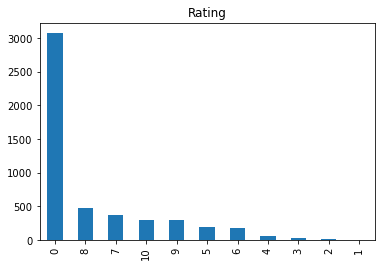

In [31]:
count = rating_dataset["rating"].value_counts()
count.plot(kind='bar', title="Rating");
 
plt.show()

Meneliti distribusi tahun terbitnya buku dari book dataframe dengan Barplot

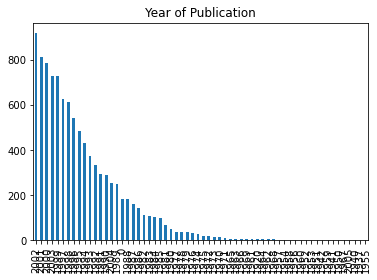

In [32]:
count = book_dataset["year_of_publication"].value_counts()
count.plot(kind='bar', title="Year of Publication");
 
plt.show()

## Multivariate Analysis

Melihat pairplot yang ada pada rating dataset

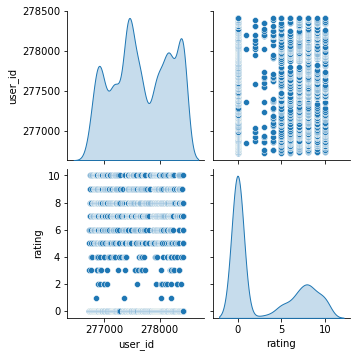

In [33]:
import seaborn as sns
sns.pairplot(rating_dataset, diag_kind = 'kde')

___
# Content Filtered Recommendation System

Content Based Filtering adalah sistem rekomendasi yang merekomendasikan item sesuai dengan item yang disukai oleh pengguna di masa lampau.

Content Based mempelajari profil dan perilaku dari pengguna yang kemudian dari informasi tersebut dianalisa dan diproses sehingga menghasilkan sistem rekomendasi yang baik. Semakin banyak informasi yang diberikan ke sistem ini, maka sistem rekomendasi berbasis content based akan memiliki akurasi yang lebih baik.

## Data Preparation

Di code bawah ini saya men-drop seluruh row yang memiliki nilai NaN

In [34]:
book_dataset = book_dataset.dropna()
rating_dataset = rating_dataset.dropna()

Pada cell code di bawah ini, saya melakukan drop atau pembuangan pada row - row yang merupakan duplikasi dari row - row yang lain, sehingga dataset kita tetap memiliki integritas dan tidak berulang

In [35]:
rating_dataset = rating_dataset.drop_duplicates()
book_dataset = book_dataset.drop_duplicates()

Meneliti deskripsi dari dataset book

In [36]:
book_dataset.shape

(10000, 8)

Meneliti deskripsi dari dataset rating

In [37]:
rating_dataset.shape

(5000, 3)

Melihat 5 row pertama dari dataset book

In [38]:
book_dataset.head()

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Untuk selanjutnya, kita perlu mengubah dataframe dari buku menjadi sebuah list

In [39]:
book_ISBN = book_dataset['ISBN'].tolist()

book_title = book_dataset['book_title'].tolist()

book_author = book_dataset['book_author'].tolist()

book_year_of_publication = book_dataset['year_of_publication'].tolist()

Setelah kita membuat list, kita perlu membuat dictionary yang digunakan untuk memnentukan pasangan key-value pada book_ISBN, book_title, book_author, dan book_year_of_publication.

In [40]:
book = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'book_title': book_title,
    'book_author': book_author,
    'book_year_of_publication': book_year_of_publication
})
book

,book_ISBN,book_title,book_author,book_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
9995,0380730774,Read This and Tell Me What It Says : Stories (...,A. Manette Ansay,1998
9996,0862418879,The Star Rover,Jack London,2000
9997,340414645X,Die Keltennadel.,Patrick Dunne,2001
9998,3442730988,Tod in der Datscha.,Anna Malyschewa,2003


## Modeling

Pada content Based Filtering, kita akan menggunakan TF-IDF Vectorizer untuk membangun sistem rekomendasi berdasarkan penulis buku.

TF-IDF yang merupakan kepanjangan dari Term Frequency-Inverse Document Frequency memiliki fungsi untuk mengukur seberapa pentingnya suatu kata terhadap kata - kata lain dalam dokumen.
Kita umumnya menghitung skor untuk setiap kata untuk menandakan pentingnya dalam dokumen dan corpus. Metode sering digunakan dalam Information Retrieval dan Text Mining.

Pada cell code di bawah ini kita akan mengambil kata - kata penting dalam kolom book_author

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tf = TfidfVectorizer()
 
tf.fit(book['book_author']) 
 
tf.get_feature_names() 

['aaron',
 'aarsen',
 'abbey',
 'abbott',
 'abby',
 'abelar',
 'abraham',
 'abrahams',
 'abzug',
 'achebe',
 'ackerman',
 'ackroyd',
 'ad',
 'adam',
 'adamo',
 'adams',
 'adamson',
 'addis',
 'adele',
 'adeline',
 'adie',
 'adkins',
 'adler',
 'adrian',
 'adriana',
 'adrienne',
 'africa',
 'agatha',
 'agnes',
 'aguiar',
 'agustã',
 'agut',
 'ahdaf',
 'ahlberg',
 'ahne',
 'aidan',
 'aiden',
 'aiken',
 'aileen',
 'aimee',
 'ainslie',
 'akiba',
 'al',
 'alain',
 'alan',
 'alatas',
 'alba',
 'albanese',
 'albano',
 'albert',
 'alberts',
 'albom',
 'albright',
 'alcock',
 'alcorn',
 'alcott',
 'aldiss',
 'aldous',
 'aldrich',
 'aldrin',
 'alec',
 'aleister',
 'alejandro',
 'alejo',
 'aleksandr',
 'aleramo',
 'alers',
 'alesia',
 'alessandra',
 'alessandro',
 'alex',
 'alexa',
 'alexander',
 'alexandra',
 'alexandre',
 'alfie',
 'alfonsi',
 'alford',
 'alfred',
 'ali',
 'alice',
 'alicia',
 'alien',
 'alighieri',
 'alisa',
 'alison',
 'alistair',
 'alix',
 'aljean',
 'allan',
 'allen',
 'all

Kemudian kita akan lakukan fit dan transformasi ke dalam matriks, pada code di bawah ini, matriks tersebut adalah tfidf_matrix

In [42]:
tfidf_matrix = tf.fit_transform(book['book_author']) 
 
tfidf_matrix.shape 

(10000, 5575)

Pada tfidf_matrix terdapat 10000 ukuran data dan 5575 nama penulis buku


.todense(), atribut ini dipakai untuk mengubah tfidf_matrix yang awalnya vektor menjadi matriks

In [43]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Dataframe di bawah ini digunakan untuk melihat matriks dari judul buku dengan penulis - penulis buku

In [44]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=book.book_title
).sample(10, axis=1,replace=True).sample(10, axis=0)

,bell,kitty,mackie,ellyn,tulchinsky,rachelle,greenhall,stanislaw,wolzien,sedaris
book_title,,,,,,,,,,
There Are No Children Here: The Story of Two Boys Growing Up in the Other America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Empty Chair,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Le Parfum : Histoire d'un meurtrier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abduction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Route 66 Traveler's Guide and Roadside Companion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hang a Thousand Trees with Ribbons: The Story of Phillis Wheatley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Big Camp Secret (Sweet Valley Twins, No 3/Super Edition)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mittsommermord. Roman.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Behind the Scenes at the Museum : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dalam sistem rekomendasi, kita perlu mencari cara supaya item yang kita rekomendasikan tidak terlalu jauh dari data pusat, oleh karena itu kita butuh derajat kesamaan pada item, dalam proyek ini, buku dengan derajat kesamaan antar buku dengan cosine similarity

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada code di bawah ini kita akan membuat dataframe cosine_sim_df dengan baris dan kolomnya adalah judul dari buku

In [46]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book['book_title'], columns=book['book_title'])

Di bawah ini adalah fungsi untuk mendapatkan rekomendasi berbasis penulis buku dengan k sebagai jumlah rekomendasi yang diingkan, dalam fungsi ini, kita akan mendapatkan 5 rekomendasi

Atribut argpartition berguna untuk mengambil sejumlah nilai k, dalam fungsi ini 5 tertinggi dari tingkat kesamaan yang berasal dari dataframe cosine_sim_df.

In [47]:
def author_recommendations(i, M, items, k=5):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Pada code cell di bawah ini, kita akan mencari rekomendasi dari buku yang sudah dibaca, dalam kasus ini, buku yang sudah dibaca adalah "The Diaries of Adam and Eve" yang ditulis oleh Mark Twain dan terbit pada tahun 1998

In [48]:
books_that_have_been_read = "The Diaries of Adam and Eve"
book[book.book_title.eq(books_that_have_been_read)]

,book_ISBN,book_title,book_author,book_year_of_publication
4700,0965881199,The Diaries of Adam and Eve,Mark Twain,1998


Pada cell code di bawah ini, kita akan mendapatkan 5 rekomendasi dari buku "The Diaries of Adam and Eve"

In [49]:
recommendations = author_recommendations(books_that_have_been_read, cosine_sim_df, book[['book_title', 'book_author']])

Pada beberapa kasus, rekomendasi akan memberikan rekomendasi yang terduplikat, sehingga perlu dibuang rekomendasi yang terduplikat

In [50]:
recommendations = recommendations.drop_duplicates()

Berikut adalah 5 buku rekomendasi yang ditulis oleh Mark Twain

In [51]:
recommendations

,book_title,book_author
0,ADVENTURES OF HUCKLEBERRY FINN (ENRICHED CLASS...,Mark Twain
1,Adventures of Huckleberry Finn,Mark Twain
2,The Complete Short Stories of Mark Twain (Bant...,Mark Twain
3,Treasury of Illustrated Classics: Adventures o...,Mark Twain
4,A Connecticut Yankee in King Arthur's Court (D...,Mark Twain


## Evaluation

Kita akan memakai metrik evaluasi akurasi di mana akurasi adalah:

Jumlah buku yang direkomendasikan sesuai penulis / Jumlah buku yang ditulis oleh penulis yang sama

Variabel books_that_have_been_read_row di bawah ini akan mengambil satu row dari buku yang pernah dibaca sebelumnya, dan variabel books_that_have_been_read_author adalah penulis buku dari buku yang pernah dibaca sebelumnya

In [52]:
books_that_have_been_read_row = book_dataset[book_dataset.book_title == books_that_have_been_read]
books_that_have_been_read_author = books_that_have_been_read_row.iloc[0]["book_author"]

Variabel books_with_the_same_author menunjukkan jumlah buku yang sudah ditulis oleh penulis buku yang berasal dari buku yang pernah dibaca sebelumnya

In [53]:
books_with_the_same_author = book_dataset[book_dataset.book_author == books_that_have_been_read_author].shape[0]
print(books_with_the_same_author)

16


Ternyata buku yang telah ditulis oleh Mark Twain berjumlah 16 buku, oleh karena itu

In [63]:
Accuracy = (recommendations.shape[0]/books_with_the_same_author)*100
print("Accuracy of the model is {}%".format(Accuracy))

Accuracy of the model is 31.25%
